In [84]:
from keras.datasets import mnist

### Load dataset into train and test

In [85]:
(train_image, train_label) , (test_image , test_label) = mnist.load_data()

In [86]:
print("train images dimension =" , train_image.ndim)
print("train images shape = ",train_image.shape)

train images dimension = 3
train images shape =  (60000, 28, 28)


### ``` let's display 4th digit ```

In [87]:
digit = train_image[4]

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

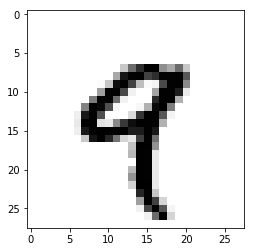

In [103]:
plt.imshow(digit,cmap=plt.cm.binary)

## reshape train as well as test images

In [90]:
train_image = train_image.reshape(60000,28*28)   ### 28x28 pizel images
train_image = train_image.astype('float32')/255

test_image = test_image.reshape(10000,28*28)
test_image = test_image.astype('float32') / 255

### encode labels into categories

In [91]:
from keras.utils import to_categorical

In [92]:
train_label = to_categorical(train_label,num_classes=10)
test_label = to_categorical(test_label,num_classes=10)

## Explore dataset

In [93]:
print("After reshape, new dimensions of train_image = "+ str(train_image.ndim))
print("New shape = "+str(train_image.shape))
print("Images data type = ",train_image.dtype)

After reshape, new dimensions of train_image = 2
New shape = (60000, 784)
Images data type =  float32


In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam ,RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

In [95]:
network = Sequential()

In [96]:
network.add(Dense(512,activation='relu',input_shape = (28*28,)))
network.add(Dense(10,activation='softmax'))

In [97]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
network.fit(train_image,train_label,epochs=12,batch_size=128)

Epoch 1/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.2495 - acc: 0.9281
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1018 - acc: 0.9697
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0674 - acc: 0.9803
Epoch 4/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0491 - acc: 0.9849
Epoch 5/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0372 - acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0285 - acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0211 - acc: 0.9938
Epoch 8/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0162 - acc: 0.9953
Epoch 9/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.0134 - acc: 0.9961
Epoch 10/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.0105 - acc: 0.996

In [99]:
prediction = network.predict_classes(test_image)

In [100]:
score,acc = network.evaluate(test_image,test_label,batch_size=128)

10000/10000 [==============================] - 0s 34us/step


In [101]:
print("accuracy = ",acc)

accuracy =  0.9812
